# **Palmer Penguins**

***
![Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png) 

This notebook contains my analysis of the famous Palmer Penguin dataset.

The data set is available [on GitHub](https://allisonhorst.github.io/palmerpenguins/) and the raw data is available [here](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv)

**Author: Brianne McGrath**

***

# **Dataset Overview** 

***

The Palmer Penguin dataset contains information about penguins collected from the Palmer Archipelago (Antarctica). It contains various physical measurements and categorical attributes for each penguin, allowing for comprehensive analysis of penguin characteristics of specific species. 

##### **Key Insights:** 
- The dataset offers a variety of penguin species including Adelie, Chinstrap and Gentoo.
- Penguins are catagorised based on their sex, with male and female individuals represented in roughly equal numbers and the island in which they inhabitat including Torgersen, Biscoe and Dream. 
- Physical measurements provide detailed information about the characteristics of each penguin including flipper length, bill length, bill depth and body mass. 

##### **Data Quality:**
- The dataset appears to be well-structured, with consistent formatting and minimal missing values observed. 
- Missing values are mainly within the sex readings (11).

Overall, the Palmer penguin dataset offers a well-rounded collection of data, offering opportunites for comprehensive analysis.

***


# **Imports** 

*** 

Importing necessary libraries for analysis and visualisation. 

In [1]:
# Importing Necessary Libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

***

# **Load Data**

***

Load the palmer penguins dataset from a URL.

In [2]:
# Loading the Penguin Dataset
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

***

# **Inspection of Data**

***

Inital inspection of dataset. 

In [3]:
# Reviewing Dataset
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
#Spot Checking Data
df.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
113,Adelie,Biscoe,42.2,19.5,197.0,4275.0,MALE
206,Chinstrap,Dream,42.5,17.3,187.0,3350.0,FEMALE
229,Gentoo,Biscoe,46.8,15.4,215.0,5150.0,MALE
135,Adelie,Dream,41.1,17.5,190.0,3900.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE


In [5]:
# Showing Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
# Showing Summary Statistics
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
#Checking for Columns with Missing Values
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
# Count the Number of Penguins of Each Sex
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [9]:
# Count the Number of Penguins in Each Species
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [10]:
# Count the Number of Penguins in Each Island
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [11]:
#Frequency Table
df[["species", "island", "sex"]].value_counts().reset_index(name="count")

,species,island,sex,count
0,Gentoo,Biscoe,MALE,61
1,Gentoo,Biscoe,FEMALE,58
2,Chinstrap,Dream,FEMALE,34
3,Chinstrap,Dream,MALE,34
4,Adelie,Dream,MALE,28
5,Adelie,Dream,FEMALE,27
6,Adelie,Torgersen,FEMALE,24
7,Adelie,Torgersen,MALE,23
8,Adelie,Biscoe,FEMALE,22
9,Adelie,Biscoe,MALE,22


***

# **Analysis:**

***

#### **Types of Variables:**

Upon reviewing the dataset, we have identified two types of variables that I believe will be beneficial for our analysis:

- **Numeric Variables:** These include measurements such as bill length, bill depth, flipper length, and body mass. These measurements provide detailed insights into each penguin's physical characteristics. We chose these types of variable as they give us exact measurements for the physical attributes of the penguins. Analysing numerical values allows us to understand the relationships or correlations between different characteristics in an exact and percise manner.

- **Categorical Variables:** The dataset includes categorical attributes such as species, island and sex. With three distinct species, islands and two sexes represented, these attributes enable comprehensive analysis and comparison across different groups of penguins. Analyising categorical variables allows us to explore similarites and between groups. We can find patterns or variations that may exist within these categories.

Our analysis will primarily focus on these two types of variables. The numeric values offering rich information, providing detailed insights into the dataset. Additionally, the categorical variables allow for further exploration based on sex, islands and species, enhancing the depth of our analysis.


## **Bar Charts:**

***

##### **Count of Penguins by Species:**

The Bar Chart below shows the distribution of penguins across different species in the dataset. 
- Adelie penguins are the most abundant species (152).
- Gentoo have a slightly smaller count (124). 
- Chinstrap penguins are the least represented (68). 

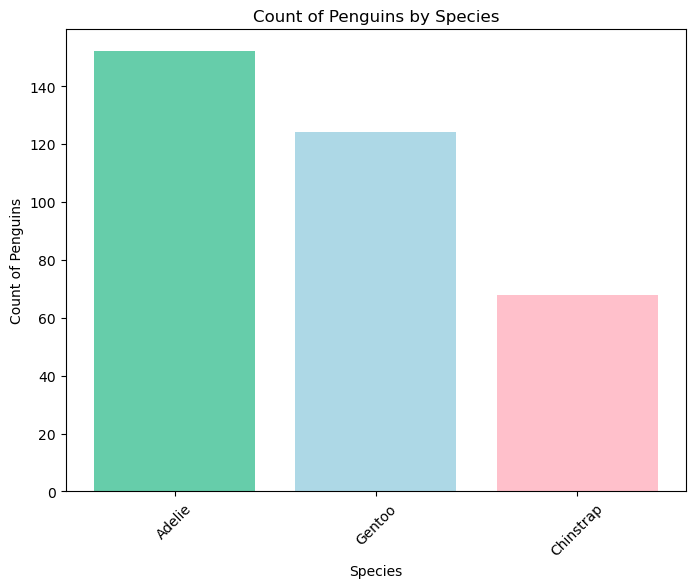

In [12]:
# Count of Penguins by Species
penguins_count_by_species = df['species'].value_counts()

# Colours for Different Species

colours=['mediumaquamarine', 'lightblue', 'pink']

# Creating Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(penguins_count_by_species.index, penguins_count_by_species.values, color=colours)
plt.title('Count of Penguins by Species')
plt.xlabel('Species')
plt.ylabel('Count of Penguins')
plt.xticks(rotation=45)
plt.show()

#### **Count of Penguins by Sex:**

The Bar Chart shows the distribution of penguins based on their sex. We can see that both Males and Females are represented in roughly equal numbers. 

- Male (168)
- Female (165)

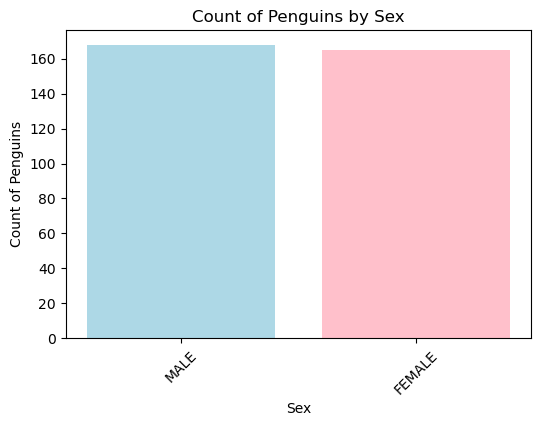

In [13]:
# Count of Penguins by Sex
penguins_count_by_sex = df['sex'].value_counts()

#Colours for Male and Female
colours = ['lightblue', 'pink']
# Creating Bar Chart
plt.figure(figsize=(6, 4))
plt.bar(penguins_count_by_sex.index, penguins_count_by_sex.values, color=colours)
plt.title('Count of Penguins by Sex')
plt.xlabel('Sex')
plt.ylabel('Count of Penguins')
plt.xticks(rotation=45)
plt.show()

#### **Count of Penguins by Island:**

The Bar Chart shows the distribution of penguins based on the island they inhabitat. 

- Biscoe (168)
- Dream (124)
- Torgersen (52)

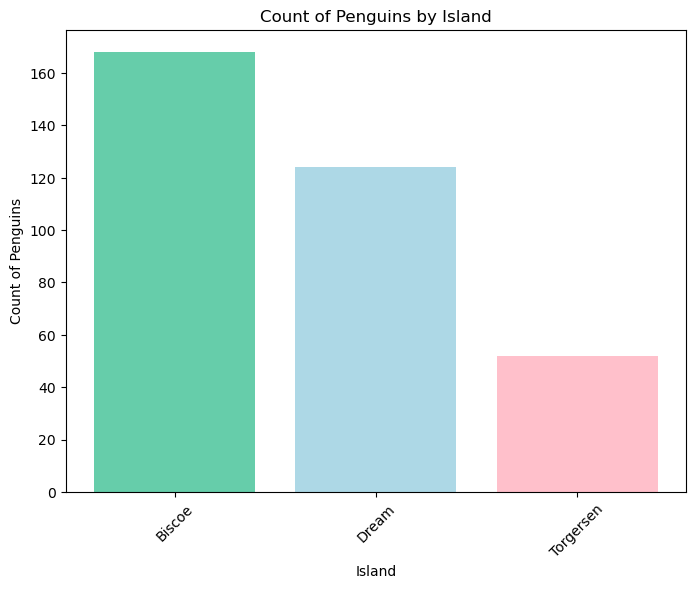

In [14]:
#Count of Penguins by Island
penguins_count_by_island = df['island'].value_counts()

#Colours for Biscoe, Dream, Torgersen 
colours=['mediumaquamarine', 'lightblue', 'pink']

#Creating Bar Chart
plt.figure(figsize=(8,6))
plt.bar(penguins_count_by_island.index, penguins_count_by_island.values, color=colours)
plt.title('Count of Penguins by Island')
plt.xlabel('Island')
plt.ylabel('Count of Penguins')
plt.xticks(rotation=45)
plt.show()

***

# **Histograms**

****

We will look at the distribution over the four variables we intend to analyse through histograms and observe the distribution by species. 

#### **Bill Length:**

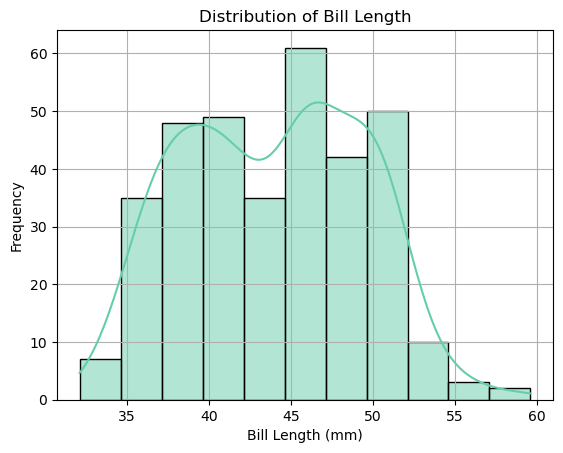

In [15]:
# Histogram - Bill Length
sns.histplot(df['bill_length_mm'], kde=True, color='mediumaquamarine')
plt.title('Distribution of Bill Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


Histogram for Bill Length displays a distribution that resembles somewhat of a normal curve, with the majority of data points clustered around the centre.

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


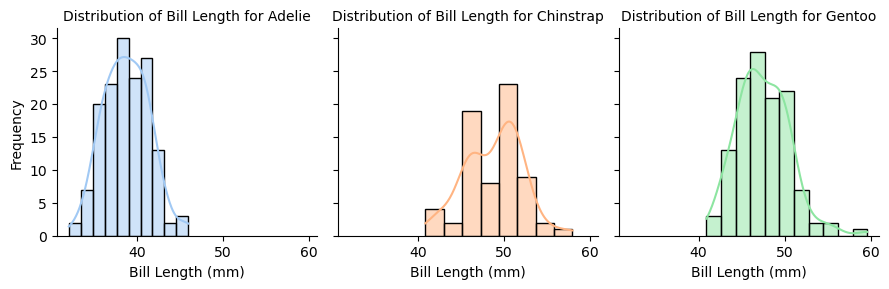

In [37]:
# Create separate Histograms for Bill Length by Species
sns.FacetGrid(df, col="species", hue="species", palette="pastel").map(sns.histplot, "bill_length_mm", kde=True).set_titles("Distribution of Bill Length for {col_name}").set_axis_labels("Bill Length (mm)", "Frequency")
plt.show()

When broken down by species, it's clear that Adelie penguins tend to have the shortest Bill Lengths, while the Chinstrap and Gentoo species showing comparable values at the longer range. 

#### **Bill Depth:**

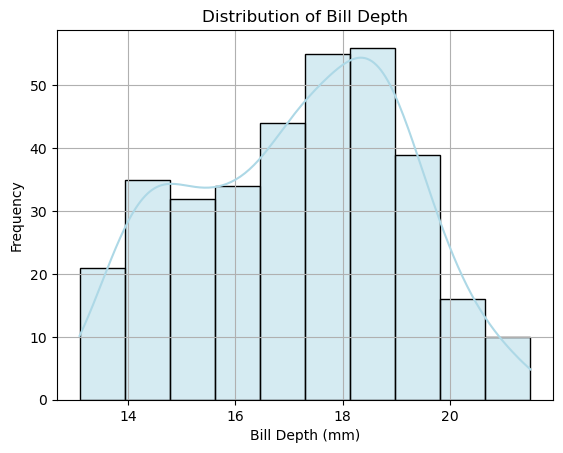

In [16]:
# Histogram - Bill Depth
sns.histplot(df['bill_depth_mm'], kde=True, color='lightblue')
plt.title('Distribution of Bill Depth')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


Histogram for Bill Depth displays a narrow range of values with the majority of readings between 16-20mm.

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


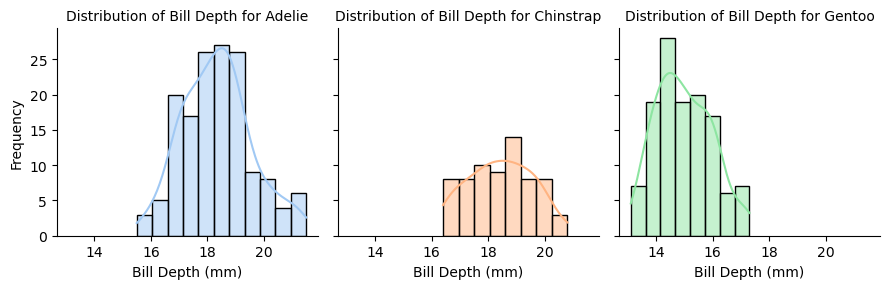

In [38]:
# Create separate Histograms for Bill Depth by species
sns.FacetGrid(df, col="species", hue="species", palette="pastel").map(sns.histplot, "bill_depth_mm", kde=True).set_titles("Distribution of Bill Depth for {col_name}").set_axis_labels("Bill Depth (mm)", "Frequency")
plt.show()


When analysed across species, Adelie and Chinstrap penguins show a comparable range in Bill Depth with larger values, whereas Gentoo penguins show the smallest values in this regard.

#### **Flipper Length:**

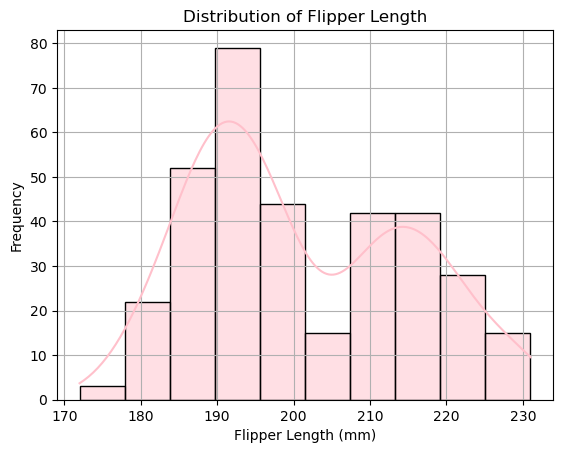

In [17]:
# Histogram - Flipper Length
sns.histplot(df['flipper_length_mm'], kde=True, color='pink')
plt.title('Distribution of Flipper Length')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Histogram for Flipper Length shows a prominent peak centred around the 190mm mark, suggesting this value is the most frequently observed. The distribution of Flipper Length appears to span a relatively wide range of values, reflecting the variabilty in Flipper Lengths across the dataset. 

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


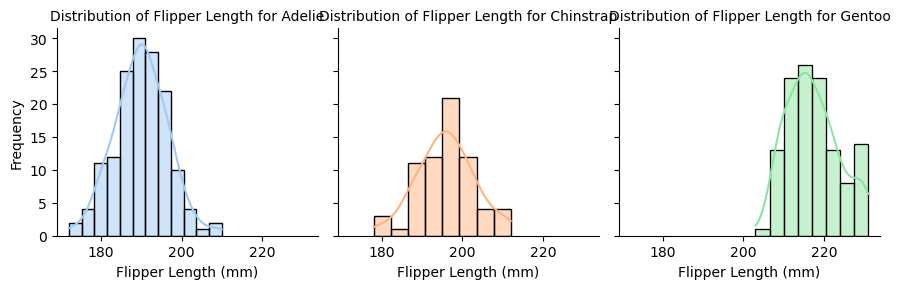

In [39]:
# Create separate Histograms for Flipper Length by Species
sns.FacetGrid(df, col="species", hue="species", palette="pastel").map(sns.histplot, "flipper_length_mm", kde=True).set_titles("Distribution of Flipper Length for {col_name}").set_axis_labels("Flipper Length (mm)", "Frequency")
plt.show()


When examining Flipper Legnth across species, Adelie and Chinstrap penguins display a comparable range of values, with the majority of Adelie penguins showing Flipper Lengths around the 190mm mark. Gentoo penguins have Flipper Lengths larger than 200mm, indicating the longest measurements among the species. 

#### **Body Mass:**

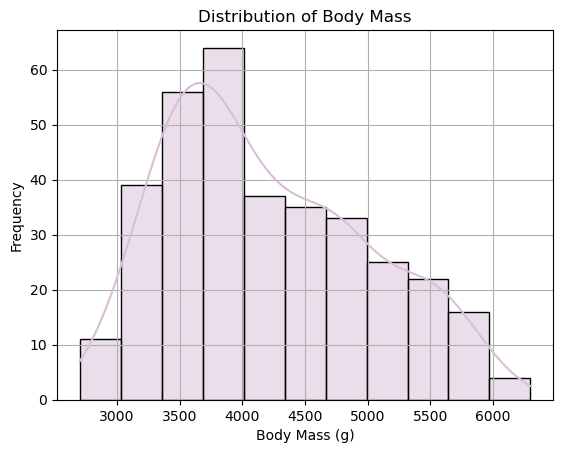

In [18]:

# Histogram - Body Mass
sns.histplot(df['body_mass_g'], kde=True, color='thistle')
plt.title('Distribution of Body Mass')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Historgram for Body Mass shows a right-skewed distribution, suggesting that the majority of penguins have lower body masses. The skewned nature of the histogram suggests there may be some outliers with exceptionally high body masses, pulling the distributiong towards the right side of the histogram. 

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


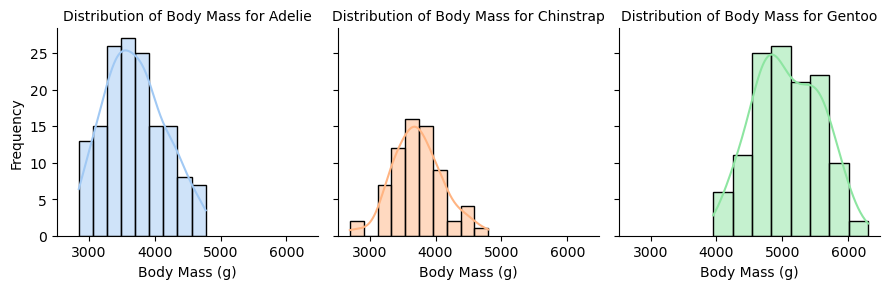

In [36]:
# Create separate Histograms for Body Mass by Species
sns.FacetGrid(df, col="species", hue="species", palette="pastel").map(sns.histplot, "body_mass_g", kde=True).set_titles("Distribution of Body Mass for {col_name}").set_axis_labels("Body Mass (g)", "Frequency")
plt.show()

When examing Body Mass across species, Adelie and Chinstrap penguins display a comparable range of values. Both species exhibit smaller values suggesting low body mass amongst the two species. Gentoo penguins have larger readings for Body Mass starting at 4000G, showing they are the largest penguins in terms of Body Mass across the three species. 

### **Summary of Histograms:**

Our analysis of the histograms led us to these key insights into physical characteristics of each species:

- Adelie Penguins: Shorter Bill Length, larger Bill Depth, shorter Flipper Length, and smaller Body Mass compared to the other species. 
- Gentoo Penguins: Longer Bill Length, smaller Bill Depth, longer Flipper Length, and the largest Body Mass among the species.
- Chinstrap Penguins: Longer Bill Length, larger Bill Depth, shorter Flipper Length, and smaller Body Mass compared to Gentoo penguins.

It's important to note that these histograms represent overall data across genders. Further exploration by gender may reveal additional variations within each species. Additionally, the larger number of readings for Adelie and Gentoo species provides a more comprehensive understanding of their characteristic features.  

***

# **Correlation Analysis: Examing Relationships Between Variables**

***

### **Bill Length vs Bill Depth:**

Let's compare the relationship between Bill Length and Bill Depth in our Palmer Penguins dataset.

Our aim for this analysis is to identify any possible correlation between these two variables. We will begin our examination by calculating the Pearson correlation coefficient. Furthermore, we will investigate correlations based on species and gender."

In [20]:
# Calculate Pearson correlation coefficient
correlation = df['bill_length_mm'].corr(df['bill_depth_mm'])

# Print the correlation coefficient
print("Pearson correlation coefficient:", correlation)

Pearson correlation coefficient: -0.23505287035553268


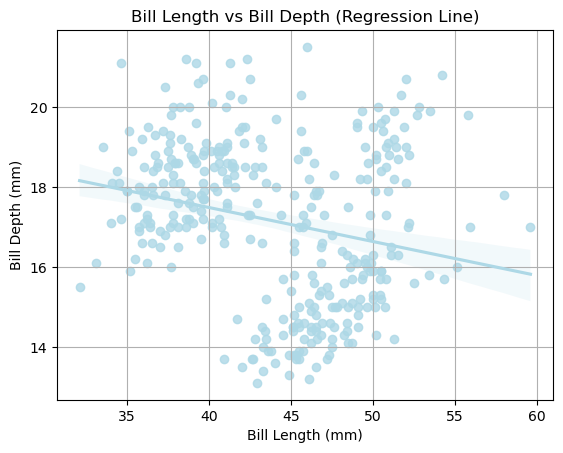

In [21]:
#Scatter Plot with Regression Line for Bill Length and Bill Depth 
sns.regplot(x='bill_length_mm', y='bill_depth_mm', data=df, color='lightblue')
plt.title('Bill Length vs Bill Depth (Regression Line)')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.grid()
plt.show()

Based on our initial analysis, it's evident that there is a negative correlation between Bill Length and Bill Depth. However, the scattered distribution of points around the regression line indicates a weaker correlation. Let's look deeper into the relationship, analysing each species separately to assess it's impact on the correlation. We will present our findings. 

In [22]:
# Calculate Pearson correlation coefficient for Adelie penguins
adelie_correlation = df[df['species'] == 'Adelie']['bill_length_mm'].corr(df[df['species'] == 'Adelie']['bill_depth_mm'])

# Calculate Pearson correlation coefficient for Chinstrap penguins
chinstrap_correlation = df[df['species'] == 'Chinstrap']['bill_length_mm'].corr(df[df['species'] == 'Chinstrap']['bill_depth_mm'])

# Calculate Pearson correlation coefficient for Gentoo penguins
gentoo_correlation = df[df['species'] == 'Gentoo']['bill_length_mm'].corr(df[df['species'] == 'Gentoo']['bill_depth_mm'])

# Print the correlation coefficients
print("Pearson correlation coefficient for Adelie penguins:", adelie_correlation)
print("Pearson correlation coefficient for Chinstrap penguins:", chinstrap_correlation)
print("Pearson correlation coefficient for Gentoo penguins:", gentoo_correlation)


Pearson correlation coefficient for Adelie penguins: 0.3914916918358763
Pearson correlation coefficient for Chinstrap penguins: 0.6535362081800428
Pearson correlation coefficient for Gentoo penguins: 0.6433839465253381


c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


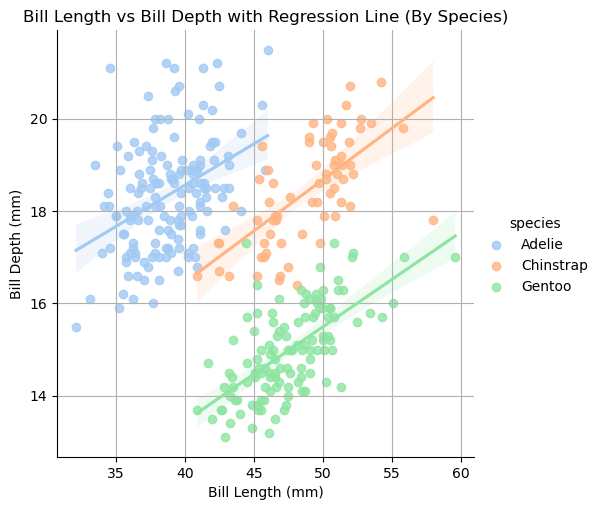

In [23]:
# lmplot separated by Species
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', data=df, hue='species', palette='pastel')
plt.title('Bill Length vs Bill Depth with Regression Line (By Species)')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.grid()
plt.show()

We now are seeing a positive correlation between Bill Length and Bill Depth across all species. This implies that as Bill Length increases, so does Bill Depth, regardless of the penguin species. This implies a consistent trend in the penguins' physical attributes.

Let's further investigate the relationship by filtering the data based on sex. This will allow us to explore whether the observed correlation between Bill Depth and Bill Length remains consistent across different genders within each species. 

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


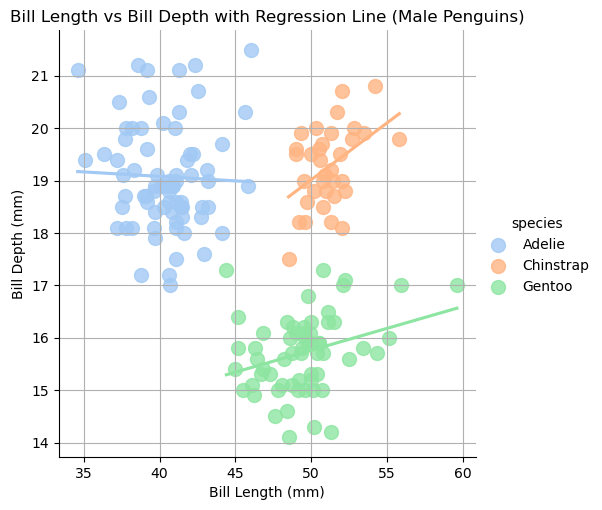

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


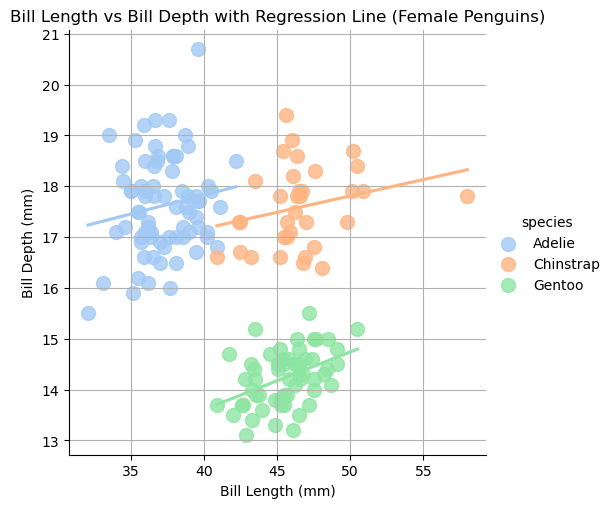

In [24]:
# Filter by Sex
male_df = df[df['sex'] == 'MALE']
female_df = df[df['sex'] == 'FEMALE']

# lmplot separated by Species for Males
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', data=male_df, hue='species', palette='pastel', ci=None, scatter_kws={'s': 100})
plt.title('Bill Length vs Bill Depth with Regression Line (Male Penguins)')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.grid()
plt.show()

# lmplot separated by Species for Females
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', data=female_df, hue='species', palette='pastel', ci=None, scatter_kws={'s': 100})
plt.title('Bill Length vs Bill Depth with Regression Line (Female Penguins)')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.grid()
plt.show()

In our analysis of our two variables filtered by sex, we observe a predominantly positive correlation across most species. However, male Adelie penguins showed a negative correlation. This suggests potential variations in physical characteristics between male and female penguins. 

### **Summary of Bill Length vs Bill Depth:**

Our analysis displayed a predominantly positive correlation between Bill Depth and Bill Length across penguin species and genders, suggesting a consistent trend in the correlation between the two variables across species and genders. An interesting observation occurred within male Adelie penguins, showing a slight negative correlation. This analysis highlights the importance of considering species and gender distinctions in understanding physical variations among penguins and their effect on correlation.

***

### **Flipper Length vs Body Mass:**

Similarily, we'll explore the relationship between Flipper Length and Body Mass across different penguin species and genders in the Palmer Penguin dataset. 

Our aim is to see if there's a correlation between these two variables, first by calculating the Pearson correlation coefficient. Then, we will investigate the correction based on species and gender. 

In [25]:
# Calculate Pearson correlation coefficient
correlation = df['flipper_length_mm'].corr(df['body_mass_g'])

# Print the correlation coefficient
print("Pearson correlation coefficient:", correlation)

Pearson correlation coefficient: 0.8712017673060114


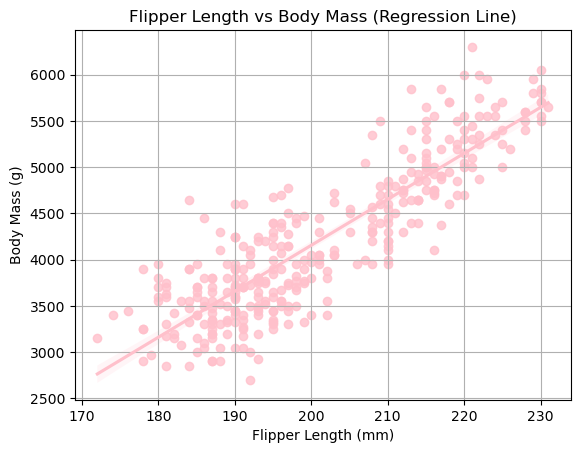

In [26]:
#Scatter Plot with Regression Line for Flipper Length and Body Mass 
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=df, color='pink')
plt.title('Flipper Length vs Body Mass (Regression Line)')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.grid()
plt.show()

We can see from the above, there is a strong positive correlation between Flipper Length and Body Mass. Overall, the points remain close to the regression line, suggesting a strong correlation. 

Let's investigate this correlation based on species and gender to assess if this will have an impact on the correlation. We'll present our findings. 

In [27]:
# Calculate Pearson correlation coefficient for Adelie penguins
adelie_correlation = df[df['species'] == 'Adelie']['flipper_length_mm'].corr(df[df['species'] == 'Adelie']['body_mass_g'])

# Calculate Pearson correlation coefficient for Chinstrap penguins
chinstrap_correlation = df[df['species'] == 'Chinstrap']['flipper_length_mm'].corr(df[df['species'] == 'Chinstrap']['body_mass_g'])

# Calculate Pearson correlation coefficient for Gentoo penguins
gentoo_correlation = df[df['species'] == 'Gentoo']['flipper_length_mm'].corr(df[df['species'] == 'Gentoo']['body_mass_g'])

# Print the correlation coefficients
print("Pearson correlation coefficient for Adelie penguins:", adelie_correlation)
print("Pearson correlation coefficient for Chinstrap penguins:", chinstrap_correlation)
print("Pearson correlation coefficient for Gentoo penguins:", gentoo_correlation)


Pearson correlation coefficient for Adelie penguins: 0.4682016942179393
Pearson correlation coefficient for Chinstrap penguins: 0.6415594129316966
Pearson correlation coefficient for Gentoo penguins: 0.7026665243575184


c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


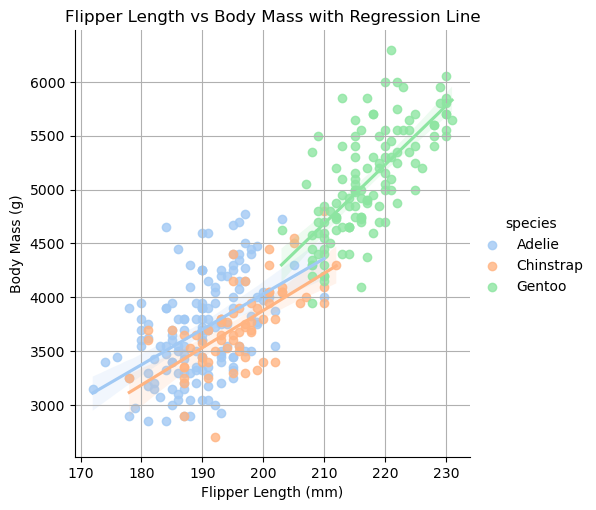

In [28]:
# lmplot separated by Species
sns.lmplot(x='flipper_length_mm', y='body_mass_g', data=df, hue='species', palette='pastel')
plt.title('Flipper Length vs Body Mass with Regression Line')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.grid()
plt.show()

Again, we see a positive correlation between Flipper Length and Body Mass. This implies that as Flipper Length increase, so does Body Mass, regardless of the penguin species. This again implies a consistent trend in correlation for these variables throughout sepcies. 

Let's continue investigating the relationship by filtering the data based on gender. This will allow us to explore whether the observed correlation between Flipper Length and Body Mass remains consistent across different genders. 

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


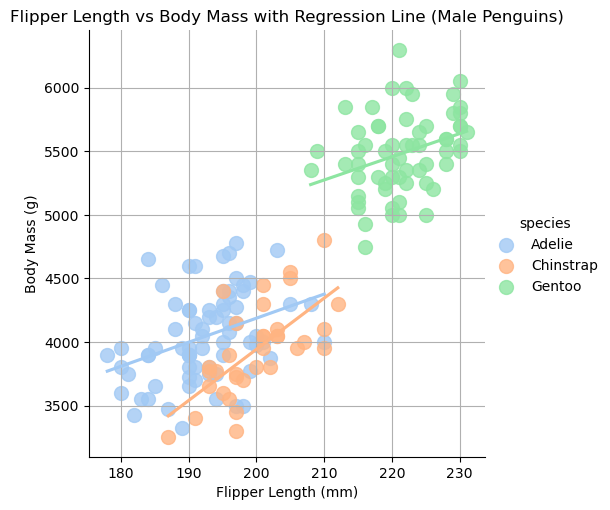

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


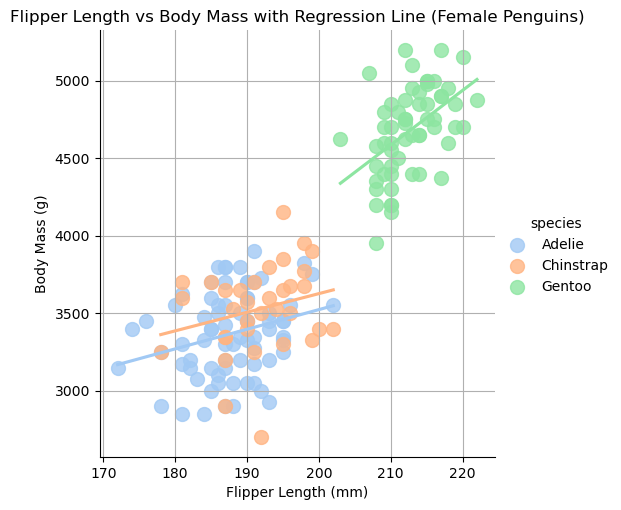

In [29]:
# Filter by Sex
male_df = df[df['sex'] == 'MALE']
female_df = df[df['sex'] == 'FEMALE']

# lmplot separated by Species for Males
sns.lmplot(x='flipper_length_mm', y='body_mass_g', data=male_df, hue='species', palette='pastel', ci=None, scatter_kws={'s': 100})
plt.title('Flipper Length vs Body Mass with Regression Line (Male Penguins)')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.grid()
plt.show()

# lmplot separated by Species for Females
sns.lmplot(x='flipper_length_mm', y='body_mass_g', data=female_df, hue='species', palette='pastel', ci=None, scatter_kws={'s': 100})
plt.title('Flipper Length vs Body Mass with Regression Line (Female Penguins)')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.grid()
plt.show()

In our analysis of our two variables filtered by sex, we observe a postive correlation across all species with no suggestions of a negative correlation across any species or gender. 

### **Summary of Flipper Length vs Body Mass:**

Our analysis across all penguin species and genders revealed a consistent positive correlation between flipper length and body mass. This suggests that as flipper length increases, so does body mass, indicating a proportional relationship between these two physical attributes.

***

# **Conclusion:** 

***

Our analysis of the Palmer penguin dataset revealed interesting insights into characteriistics of penguins characteristics and their correlations. We looked at a variety of penguin species, including Adelie, Chinstrap, and Gentoo, with an even distribution between males and females. Detailed measurements like Bill Length, Bill Depth, Flipper Length, and Body Mass allowed for thorough analysis.

Our investigation into the correlation between these variables revealed the following:
- There's generally a positive correlation between Bill Depth and Bill Length, but male Adelie penguins showed a slight negative correlation.
- We found a consistent positive correlation between Flipper Length and Body Mass across all species and genders.
- Males tend to have larger measurements compared to females.

I believe our analysis highlights the importance of considering species and gender differences in understanding penguin characteristics. Initially, we noticed a negative correlation between Bill Length and Bill Depth. However, when we examined the data further by species and sex, we discovered more detailed relationships. Overall, our study emphasizes the need for detailed exploration to grasp the complexity of penguin features.


***

### End